In [36]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_1samp

In [13]:
#Read CSV file using pandas library
data = pd.read_csv('/content/train (4).csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
#Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [15]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
data.shape

(550068, 12)

In [20]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [21]:
#Data Cleaning
data = data.dropna()

In [22]:
column_to_encode =['User_ID','Product_ID','Gender','Age','City_Category']
le = LabelEncoder()
for column in column_to_encode:
  data[column] = le.fit_transform(data[column])
  print(column,le.classes_)


User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000642' 'P00001042' 'P00001142' 'P00001542'
 'P00002142' 'P00002242' 'P00003442' 'P00004242' 'P00004842' 'P00005542'
 'P00005942' 'P00006942' 'P00008042' 'P00010542' 'P00010742' 'P00010942'
 'P00011942' 'P00012242' 'P00014442' 'P00014642' 'P00014842' 'P00015542'
 'P00015642' 'P00015842' 'P00015942' 'P00016342' 'P00016442' 'P00016542'
 'P00016742' 'P00016842' 'P00019042' 'P00019342' 'P00021842' 'P00023342'
 'P00024142' 'P00025242' 'P00025342' 'P00025442' 'P00026042' 'P00027842'
 'P00028442' 'P00028542' 'P00029542' 'P00030842' 'P00030942' 'P00031842'
 'P00032042' 'P00034042' 'P00034142' 'P00034242' 'P00034442' 'P00034742'
 'P00035042' 'P00035342' 'P00035542' 'P00035842' 'P00035942' 'P00036842'
 'P00037142' 'P00038042' 'P00038142' 'P00041342' 'P00041442' 'P00042142'
 'P00043842' 'P00044242' 'P00045042' 'P00045142' 'P00045242' 'P00045342'
 'P00046742' 'P00048042' 'P00048342' 'P00050042' 'P

<ipython-input-22-5967435a4c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-22-5967435a4c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-22-5967435a4c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [23]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '1', '4+', '0', '3'], dtype=object)

In [24]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+','4')

<ipython-input-24-d33f46c7ea24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+','4')


In [25]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

<ipython-input-25-dbaa4f71de7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)


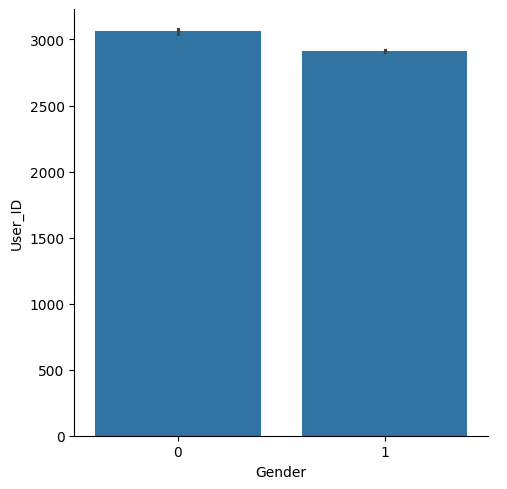

In [26]:
# Data Visualization
sns.catplot(data=data,x='Gender',y='User_ID',kind='bar')

In [27]:
a = data.corr()

<Axes: >

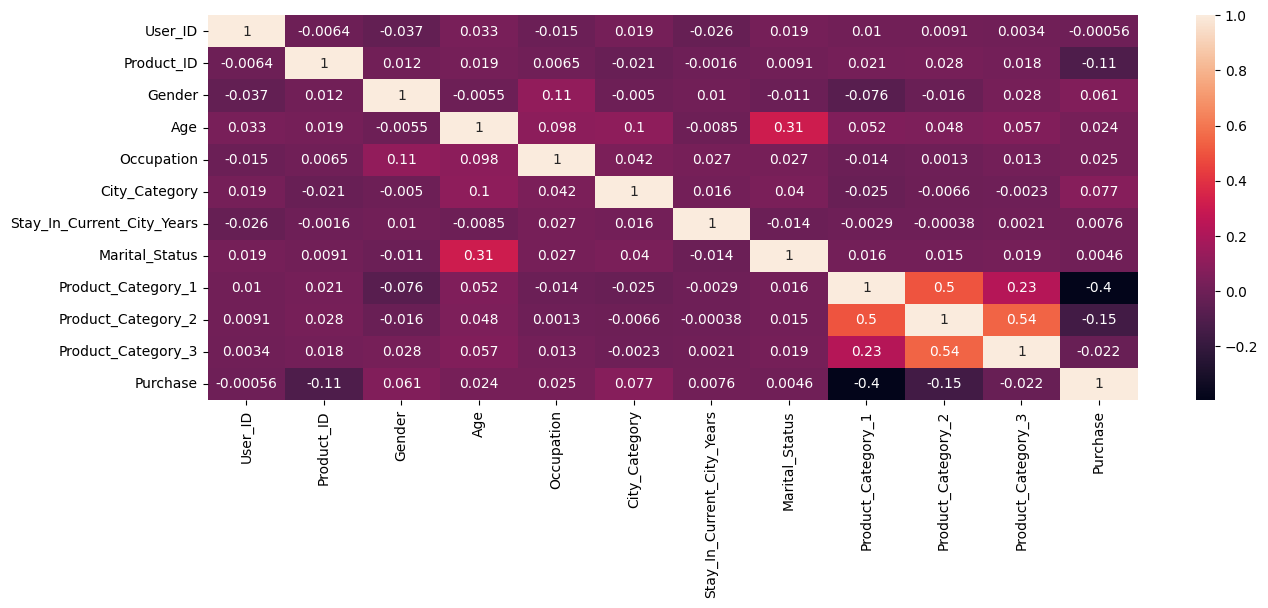

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(a,annot=True)

In [31]:
# Install package for profile report
#!pip install ydata-profiling
#from ydata_profiling import ProfileReport
'''profile = ProfileReport(data)
profile.to_file(data_report.html)'''

'profile = ProfileReport(data)\nprofile.to_file(data_report.html)'

In [44]:
# Q it was observed that the average purchase made by the men of the age 18-25 was 10000, is it still same?
#let, H0 = is eqaul to 10000
#and H1 = is not equal to 10000

In [41]:
new_data= data.loc[(data['Age']==1) & (data['Gender']==1)]

In [33]:
sample_size = 1000
sample = new_data.sample(sample_size,random_state=0)

In [35]:
pos_mean =10000
sample_mean = sample['Purchase'].mean()

In [38]:
t_stat, p_value = ttest_1samp(sample['Purchase'],pos_mean)
print(t_stat, p_value)

11.215158056527494 1.4097545140748985e-27


In [43]:
#Answer: reject null hypothesis (value of p is more than 0.05)
'''Average purchase made by men of age 18-25 is now more than 10000'''

'Average purchase made by men of age 18-25 is now more than 10000'